In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

data=pd.read_excel('Iris Dataset Classification\Iris.xls')
data.head(10)

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
X=data.iloc[:,0:4].values
Y=data.iloc[:,4:].values

# 1. Seaborn Plotting Graphs:

C:\Users\bertug\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


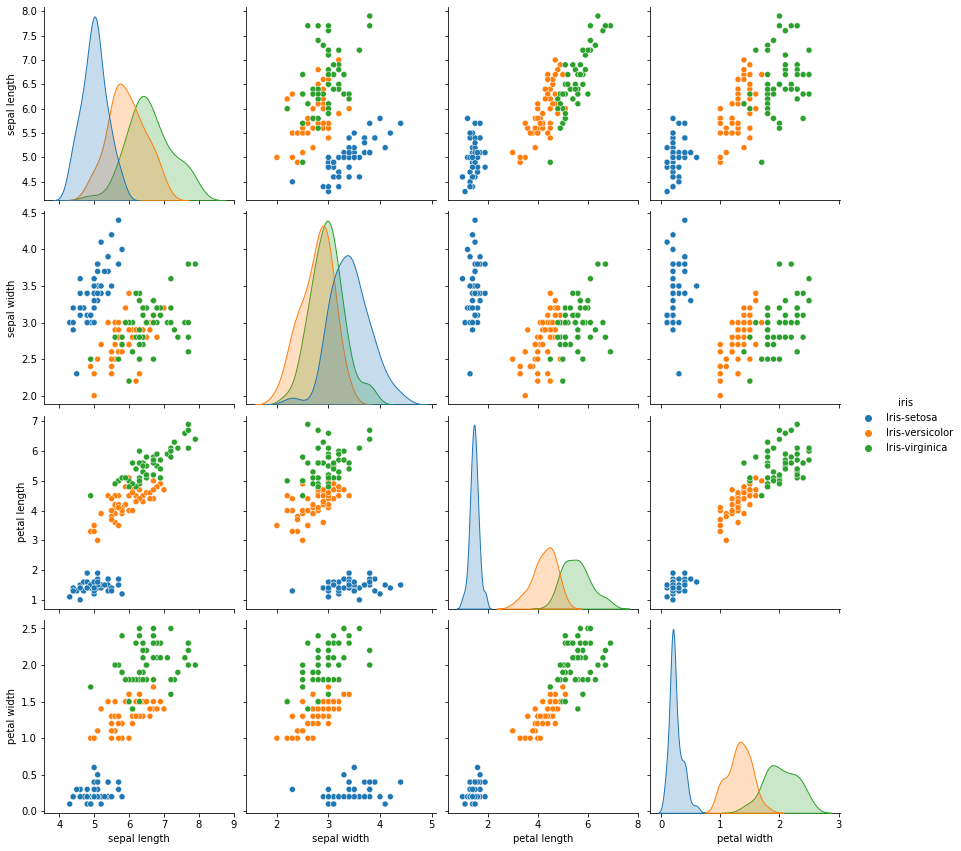

In [50]:
sbn.pairplot(data, hue="iris", size=3, diag_kind="kde")

# 2. Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# 3. Seaborn Heatmap Graph

In [52]:
data.shape

(150, 5)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

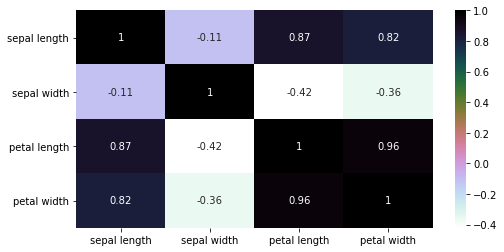

In [58]:

plt.figure(figsize=(8,4))
sbn.heatmap(data.corr(), annot=True, cmap='cubehelix_r')  
plt.show()

# 4. Import Algorithms

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# 5. Logictic Regression

In [73]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train.ravel())
logictic_predict=log_reg.predict(x_test)
con_mat=confusion_matrix(y_test,logictic_predict)
print('The confusion matrix of Logistic Regression is:')
print(con_mat)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(logictic_predict, y_test))

The confusion matrix of Logistic Regression is:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
The accuracy of Logistic Regression is:  0.9777777777777777


# 6. Support Vector Machine

In [74]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train.ravel())
svm_predict=svc.predict(x_test)
con_mat=confusion_matrix(y_test,svm_predict)
print('The confusion matrix of SVC is:')
print(con_mat)
print('The accuracy of SVC is: ', metrics.accuracy_score(svm_predict, y_test))

The confusion matrix of SVC is:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
The accuracy of SVC is:  0.9777777777777777


# 7. Decision Tree

In [78]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train, y_train.ravel())
y_pred_dtc = dtc.predict(x_test)
con_mat = confusion_matrix(y_test, y_pred_dtc)
print('The confusion matrix of Decision Tree is:')
print(con_mat)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred_dtc, y_test))

The confusion matrix of Decision Tree is:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
The accuracy of Decision Tree is:  0.9777777777777777


# 8. K-Nearest Neighbors

In [72]:
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski')
knn.fit(x_train, y_train.ravel())
knn_predict = knn.predict(x_test)
con_mat = confusion_matrix(y_test, knn_predict)
print('The confusion matrix of KNN is:')
print(con_mat)
print('The accuracy of KNN is: ', metrics.accuracy_score(knn_predict, y_test))

The confusion matrix of KNN is:
[[16  0  0]
 [ 0 16  2]
 [ 0  1 10]]
The accuracy of KNN is:  0.9333333333333333


# 9. Naive Bayes

In [75]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train.ravel())
nb_predict = gaussian_nb.predict(x_test)
con_mat = confusion_matrix(y_test, nb_predict)
print('The confusion matrix of Naive Bayes is:')
print(con_mat)
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(nb_predict, y_test))

The confusion matrix of Naive Bayes is:
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
The accuracy of Naive Bayes is:  1.0


# 10. Random Forest

In [76]:
rfc = RandomForestClassifier(n_estimators=10, criterion="entropy")
rfc.fit(x_train, y_train.ravel())
rfc_predict = rfc.predict(x_test)
con_mat = confusion_matrix(y_test, rfc_predict)
print('The confusion matrix of Random Forest is:')
print(con_mat)
print('The accuracy of Random Forest is: ', metrics.accuracy_score(rfc_predict, y_test))

The confusion matrix of Random Forest is:
[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
The accuracy of Random Forest is:  0.9555555555555556
